## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [101]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
!pip install fsspec

     |████████████████████████████████| 102kB 5.5MB/s 


In [102]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')

In [ ]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum().sum()

0

в даннных нет пропусков 

Проанализировав, я разделил пул признаков следующим образом


*   Количественные: 
    duration, amount, age
*   Порядковые:
    status, savings, employement_duration, installment_rate, number credits, people_liable 
*   Категориальные:
    credit_histoey, purpose, personal_status_sex, other_debts, property, other_installment_plans, housing, job
*   Бинарные:
    telephone, foreign worker, credit_risk


    P.S. Делив признаки на группы, я придержживвался следующей логики
    Бинарные - в колонке стоят значения да/нет и тп
    Количественные - можно измерить, тип int
    Категориальные - когда есть типы категорий, их группы (дискретное мнодество)
    Порядковые - сравнимые между собой данные (0 кредитов, 1-2, 3-4 и тп) 
    





Пропусков в даннх нет

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby('purpose').mean()['amount']

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
ds = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])
ds

0.6666666666666666

In [ ]:
import math 
ds = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])
a = ds * 100
hw12 = '{} {}'.format(math.ceil(a), "процентов клиентов моложе 30 лет снимает жилье") # string formatting
print(hw12)

67 процентов клиентов моложе 30 лет снимает жилье


In [ ]:
dz = len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40])
b = dz * 100
hw13 = '{} {}'.format(math.ceil(b), "процентов клиентов старше 40 лет снимает жилье") # string formatting
print(hw13)

69 процентов клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
foreign = len(data[(data['number_credits'] != "1") & (data['foreign_worker'] == 'yes') & (data['number_credits'] != "2-3")]) 
hw14 = '{} {} {}'.format("У", foreign, "иностранца больше трёх кредитов") # string formatting
print(hw14)

У 1 иностранца больше трёх кредитов


### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

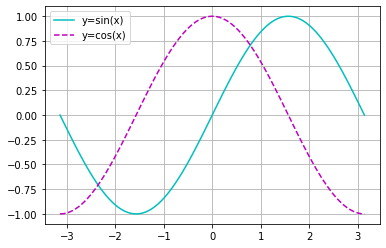

In [ ]:
# your code here

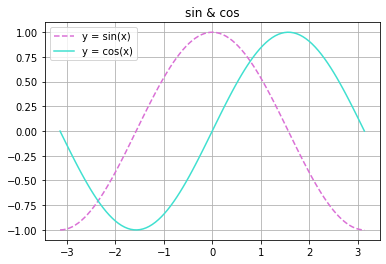

In [ ]:
x = np.linspace( -1*np.pi, np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)
plt.title('sin & cos')
plt.grid()
_ = plt.plot(x, y1, linestyle = '--', label = 'y = sin(x)', color = 'Orchid')
_ = plt.plot(x, y2, label = 'y = cos(x)', color = 'Turquoise')
plt.legend() 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

(365.4, 0.0)

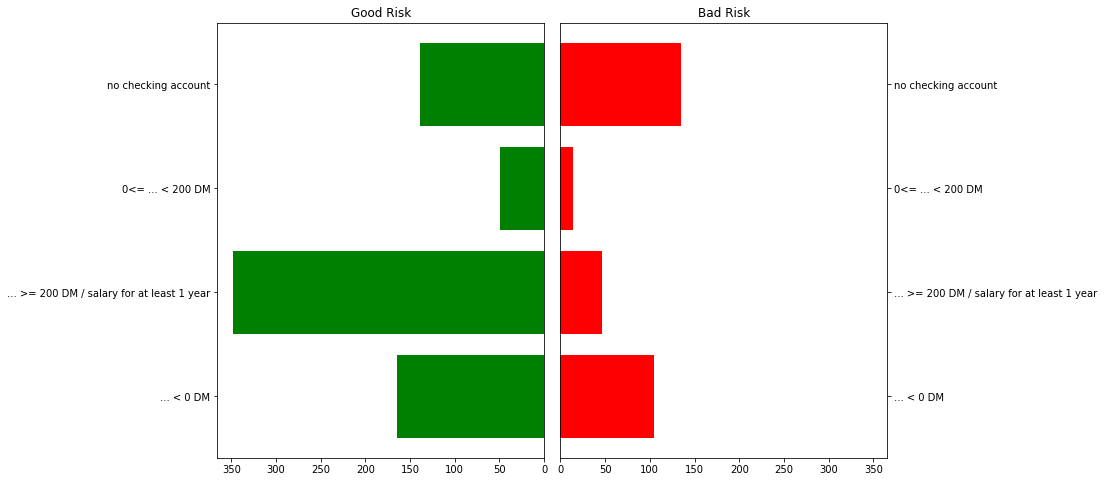

In [ ]:
#берем срезданных с условием кредитного риска (good и bad)
S1 = data.loc[data['credit_risk']=='good']
S3 = data.loc[data['credit_risk']=='bad']

#подсчитываем значения status по вырезанному ранее условию и уходим от ошибки c shape. Методом value_counts подсчитываем значения в столбце status
#с помощью sort_index не даём первому сттолбцу значений разбросаться в порядке сортировки изначального value_counts

S2 = S1['status'].value_counts().sort_index()
S4 = S3['status'].value_counts().sort_index()

fig, ax = plt.subplots(1,2, figsize=(12,8))
#делаем графики горизонтальными и добавляем цвета
ax[0].barh(S2.index, S2.values, color='green')
ax[1].barh(S4.index, S4.values, color='red')

plt.subplots_adjust(wspace=0.05) #добавляем дистанцию между категорями в графике
ax[1].yaxis.tick_right()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].title.set_text('Bad Risk')
ax[0].title.set_text('Good Risk')
ax[0].set_xlim(ax[0].get_xlim()[::-1]) #разворачиваем левый график, делаем его зеркальным правому

хочу выразить свою благодарность Гуглу, а именно следующим стаьям, поддерживающим меня на всем пути построения этого графика 
https://fooobar.com/questions/13686553/changing-sort-in-valuecounts
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.barh.html
https://stackoverflow.com/questions/38799469/flip-left-right-plotly-horizontal-histogram

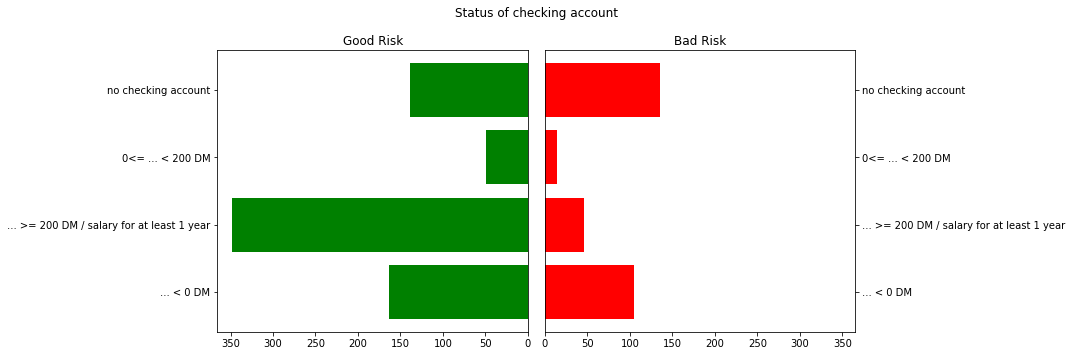

In [ ]:
# your code here

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

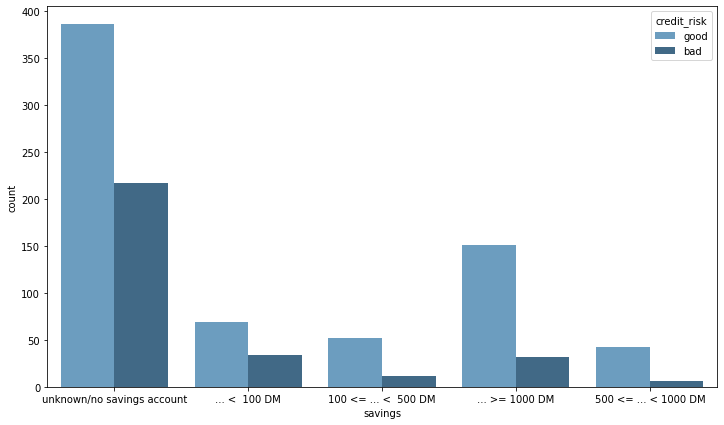

In [ ]:
fig, ax = pyplot.subplots(figsize=(12, 7)) #с помощью subplots можем настроить размер графика 
ax = sns.countplot(x="savings", hue="credit_risk", data=data, palette="Blues_d")


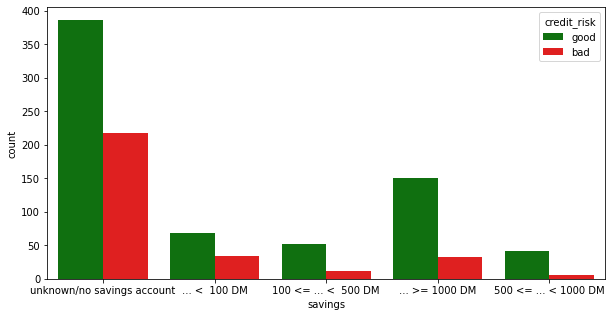

In [ ]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

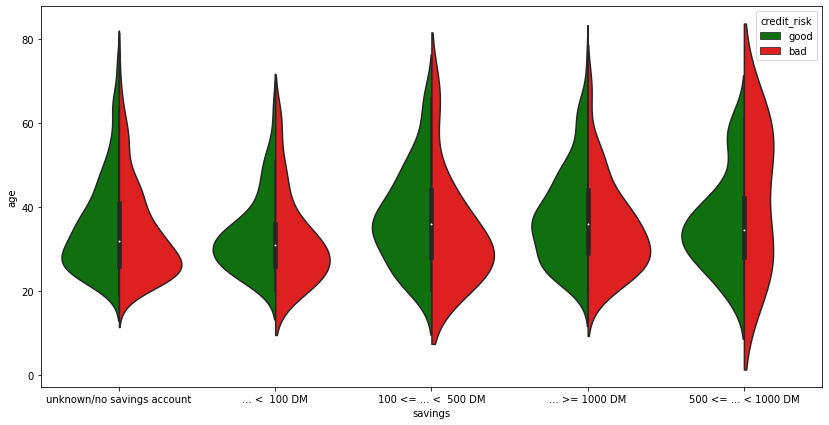

In [ ]:
# your code here

In [ ]:
%matplotlib inline

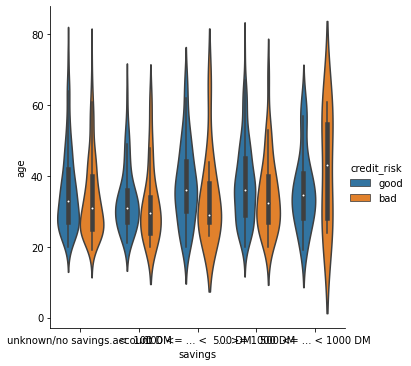

In [ ]:
sns.catplot(x="savings", y="age", hue = 'credit_risk', data = data, kind="violin", figsize=(40, 45))


### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

<BarContainer object of 100 artists>

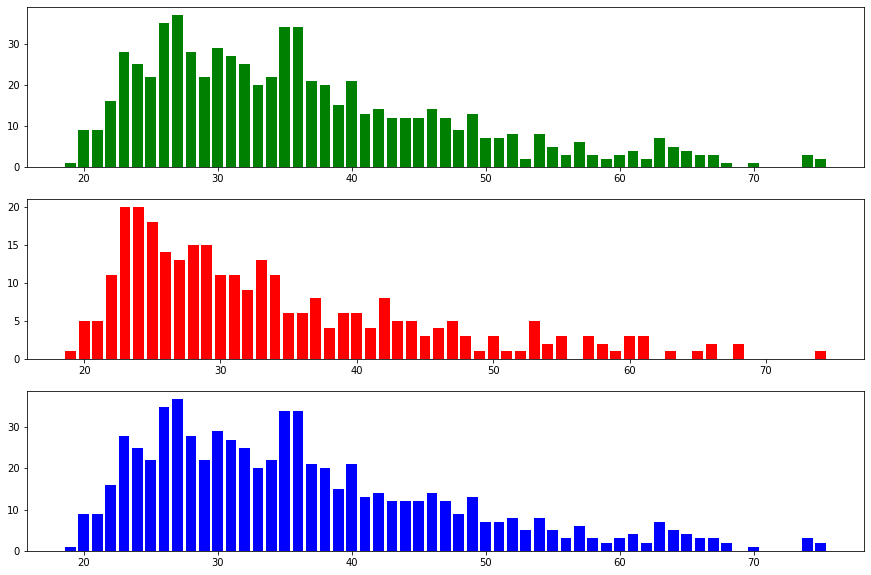

In [ ]:
#берем срезданных с условием кредитного риска (good и bad)
df1 = data.loc[data['credit_risk']=='good']
df3 = data.loc[data['credit_risk']=='bad']


df5 = df1['age'].value_counts().sort_index() 
df6 = df3['age'].value_counts().sort_index()

df7 = pd.concat([df5, df6]) #складываем два пандас сериас, чтобы на 3 графике не обнулялись значения, которые есть на первом, но нет на втором (и наоборот)

fig, ax = plt.subplots(3,1, figsize=(15, 10))
#делаем графики горизонтальными, передаем возраст на ось х, передаем колиество по credit_risk в у и добавляем цвета
ax[0].bar(df5.index, df5.values, color='green')
ax[1].bar(df6.index, df6.values, color='red')
ax[2].bar(df7.index, df7.values, color='blue')


при построении данного графика ни один питонист не пострадал.
Наши герои статьи, помогавшие мне строить сие чудо:
*   https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
*   https://stackoverflow.com/questions/42514444/how-do-you-merge-2-series-in-pandas

и другие, участвовавшие в первом пизоде (задании 7) 


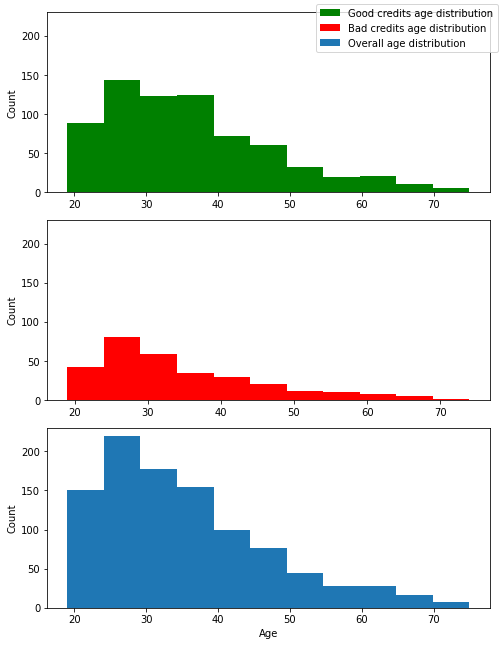

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

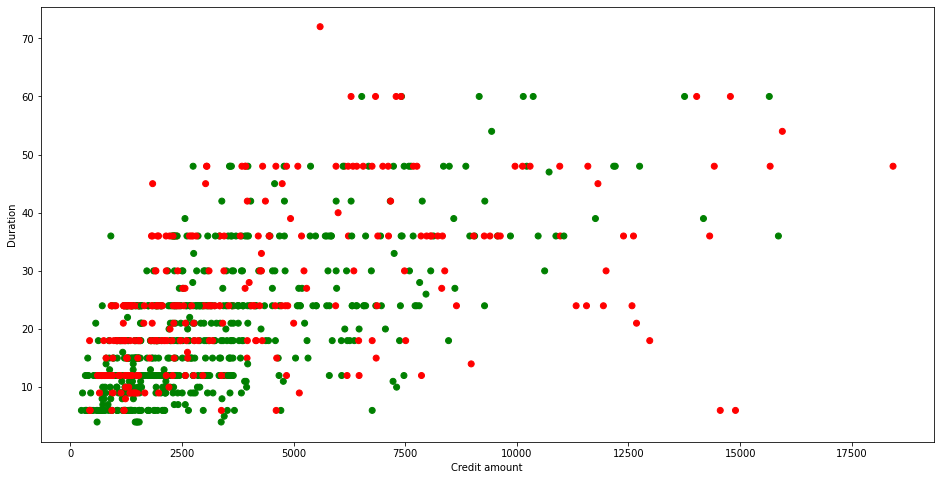

In [ ]:
# your code here

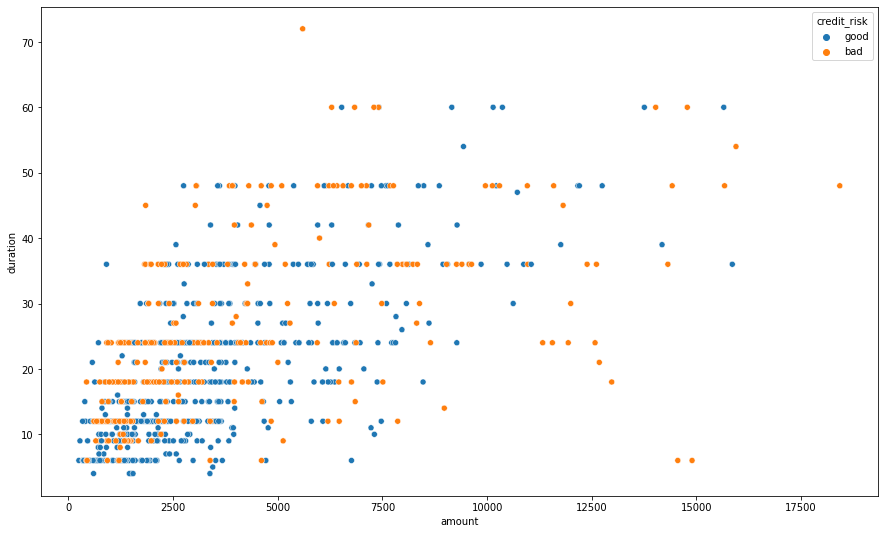

In [ ]:
fig, ax = pyplot.subplots(figsize=(15, 9))
sns.scatterplot(data = data, x = 'amount',y = 'duration', hue = 'credit_risk')


### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Пожалуйста, перед тем как запускать код из 12 задания, запустите задание 13, тк в графике испольуется закодированный столбец из задания 13
спасибо 

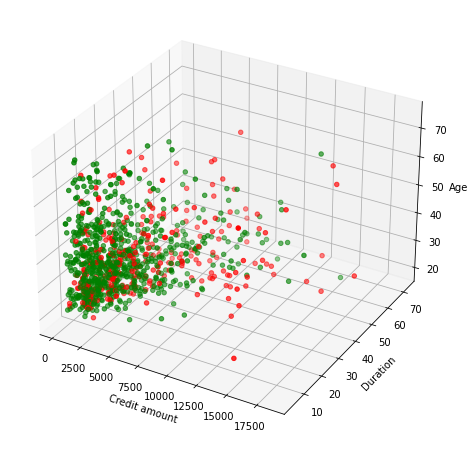

In [ ]:
# your code here

In [ ]:
d = df['credit_risklabel']

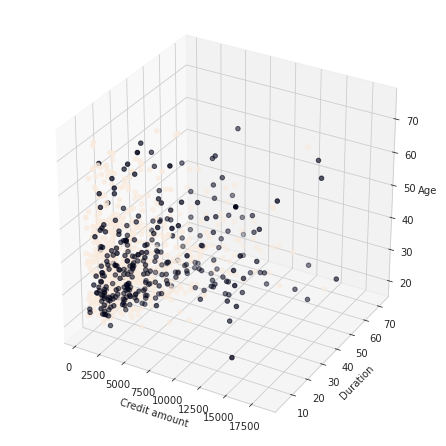

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) 


x = data['amount']
y = data['duration']
z = data['age']
m = data['credit_risk']

ax.scatter(x, y, z, c=d, marker='o')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [103]:
df = data.copy()

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
obj_cols = df.select_dtypes(include=[object])

for i in obj_cols:
    df[i+'label'] = le.fit_transform(df[i])

In [106]:
df.drop(['telephone', 'foreign_worker', 'credit_risk', 'status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable'], axis = 1, inplace=True)

In [ ]:
#dict_tel = {'no':0, 'yes (under customer name)':1}
#df.telephone = df.telephone.map(dict_tel)

In [ ]:
#dict_foreign = {'no':0, 'yes':1}
#df.foreign_worker = df.foreign_worker.map(dict_foreign)

#dict_risk = {'bad':0, 'good':1}
#df.credit_risk = df.credit_risk.map(dict_risk)

In [107]:
df.head()

,duration,amount,age,statuslabel,credit_historylabel,purposelabel,savingslabel,employment_durationlabel,installment_ratelabel,personal_status_sexlabel,other_debtorslabel,present_residencelabel,propertylabel,other_installment_planslabel,housinglabel,number_creditslabel,joblabel,people_liablelabel,telephonelabel,foreign_workerlabel,credit_risklabel
0,18,1049,21,3,0,2,4,2,2,0,2,3,1,1,0,0,1,0,0,0,1
1,9,2799,36,3,0,5,4,0,1,3,2,0,3,1,0,1,1,1,0,0,1
2,12,841,23,0,4,8,0,1,1,0,2,3,3,1,0,0,3,0,0,0,1
3,12,2122,39,3,0,5,4,0,0,3,2,0,3,1,0,1,3,1,0,1,1
4,12,2171,38,3,0,5,4,0,2,3,2,3,1,0,2,1,3,0,0,1,1


Уверен, что удалить старые колонки с типом object можно было бы куда умнее, например, испольовав срез или iloc, но я не нашел способа обойти нужные колонки, которые попадались без закономерности на пути тех, что надо было выкинуть, поэтому втупую перечислил 

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [116]:
def predict(X_test):
  s = np.linspace(1, 1, 250, dtype = int)
  return s
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = ds.drop('credit_risk', 1).values
y = ds['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.66

In [162]:
ds.head()

,duration,amount,savings,other_debtors,age,number_credits,people_liable,credit_risk
0,18,1049,0,2,21,3,1,1
1,9,2799,0,2,36,2,3,1
2,12,841,1,2,23,3,1,1
3,12,2122,0,2,39,2,3,1
4,12,2171,0,2,38,2,1,1


In [158]:
X = ds.drop('credit_risk', 1).values
y = ds['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [163]:
def predict(X_test):
  func = np.array([0.001, 0, 0, 0, 0.0001, 0.001, 0.003, 0, 0.0001, 0.1,
                   0, 0.0001, 0.005, -0.0075, 0.0075, 0, 0.0001, 0, 0, -0.15])
  X_test = X_test * func
  X_test = np.sum(X_test, axis =1)
  X_test = np.around(X_test, decimals=0)
  X_test[np.isnan(X_test)] = 0
  return X_test


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risklabel', 1).values
y = df['credit_risklabel'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.34

In [133]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[6]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: -0.03
Intercept: 0.90


In [108]:
ds = data.copy()

In [109]:
dict_r = {'good':1, 'bad':0}
ds.credit_risk = ds.credit_risk.map(dict_r)

dict_tel = {'1':3, '2-3':2, '4-5':1, '>= 6':0}
ds.number_credits = ds.number_credits.map(dict_tel)

dict_pep = {'0 to 2':1, '3 or more':3}
ds.people_liable = ds.people_liable.map(dict_pep)

dict_emp = {'< 1 yr':1, '1 <= ... < 4 yrs':2, '4 <= ... < 7 yrs':3, '>= 7 yrs':4, 'unemployed':0}
ds.emp = ds.telephone.map(dict_emp)

dict_st = {'... < 0 DM':0, '... >= 200 DM / salary for at least 1 year':3, 'no checking account':0}
ds.st = ds.status.map(dict_st)

dict_sv = {'unknown/no savings account':0, '... <  100 DM':1, '100 <= ... <  500 DM':2, '... >= 1000 DM':3, '500 <= ... < 1000 DM':4}
ds.savings = ds.savings.map(dict_sv)

dict_deb = {'none':2, 'guarantor':0, 'co-applicant':1}
ds.other_debtors = ds.other_debtors.map(dict_deb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [112]:
ds.shape

(1000, 8)

In [111]:
ds = ds.select_dtypes(exclude=['object'])

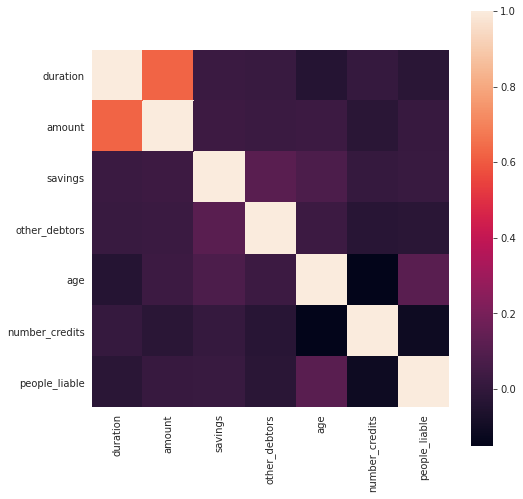

In [ ]:
correlations_data = ds.select_dtypes(include=['int64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_data , square=True)
plt.show()

так как amount и duration сильно коррелируют, уберем одну из этих переменнх, чтобы избежать мультиколлениарности 


In [ ]:
ds.drop(ds.)

In [ ]:
ds.head()

,duration,amount,savings,other_debtors,age,number_credits,people_liable,credit_risk
0,18,1049,0,2,21,3,1,good
1,9,2799,0,2,36,2,3,good
2,12,841,1,2,23,3,1,good
3,12,2122,0,2,39,2,3,good
4,12,2171,0,2,38,2,1,good


In [ ]:
a = X_test[249]

In [ ]:
d = np.apply_along_axis(func, 0, a)
d

array(1)

Четсно говоря, я два дня старался сделать по-прогерски, я понял, что для каждой строки в массиве X_test надо взять каждое значение, домножить на кф, сложить, получить число и в функции сравнивать с критическим значением, выдовая 0, если до критического значения не доходило и 1, в противном случае
я использовал np.apply_along_axis(my_func, 1, b) и создание my_func для домножения каждого значения на кф, но в конце концов столкнулся с проблемой подбора весов и критическим значением. Я честно старался, но позже заметил удачу на константной модели, поэтому раз требовалось 0,6, а я добился 0,66, то, пожалуйста, не снижайте мне баллы..
